<a href="https://colab.research.google.com/github/tselane2110/ML-Specialization/blob/main/Logistic_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression without Regularization

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import math
class LogisticRegression:
  def fit_data(self, x, y):
    """
    self.x -> training data (features)
    self.y -> training data (labels/target-values/actual-values)
    self.m -> no of training examples
    self.n -> no of features
    self.w -> initializing weights
    self.b -> initializing bias
    self.y_hat -> initializing prediction's list
    self.cost_rec -> record of cost function of all iterations
    self.min_iterations -> minimum number of iterations for our gradient descent
    self.prediction_threshold -> if the output of sigmoid function is greater than or equal to this threshold, then y_hat will be 1, else 0
    """
    self.x = x
    self.y = y
    self.m = len(self.x)
    self.n = self.x.shape[1]
    self.w = np.zeros(self.n)
    self.b = 0
    self.y_hat = []
    self.cost_rec = []
    self.min_iterations = 200
    self.prediction_threshold = 0.3

    # calling recursive gradient descent
    self.recursiveGD()

  def predict_training(self, x):
    y_hat = []
    z = []
    e = math.e
    for i in range(len(x)):
      z.append(np.dot(self.w, x[i]) + self.b)
    for i in range(len(z)):
      y_hat.append((1/(1+(pow(e, -(z[i]))))))
    return y_hat

  def predict(self, x):
    y_hat = []
    z = []
    e = math.e
    for i in range(len(x)):
      z.append(np.dot(self.w, x[i]) + self.b)
    for i in range(len(z)):
      y_hat.append((1/(1+(pow(e, -(z[i]))))))
    for i in range(len(y_hat)):
      if y_hat[i] >= self.prediction_threshold:
        y_hat[i] = 1
      else:
        y_hat[i] = 0
    return y_hat

  def calculate_loss(self, y_hat, y):
    loss = []
    for i in range(len(y_hat)):
      a = -y[i] * math.log(y_hat[i])
      b = (1 - y[i]) * math.log(1 - y_hat[i])
      loss.append(a-b)
    return loss
    """
    loss = []
    for i in range(len(y_hat)):
      if y[i] == 1:
        loss.append(-math.log(y_hat[i]))
      else:
        loss.append(-math.log(1 - y_hat[i]))
    return loss"""

  def calculate_cost(self, loss):
    cost = 0
    for i in range(len(loss)):
      cost += loss[i]
    cost *= (1/self.m)
    return cost

  def abs_diff(self, a, b):
    # abs_diff stands for absolute difference
    result = abs(a-b)
    return result

  def stopping_criteria_check(self, threshold):
    '''
    Need to check that the cost function for the last 20 iterations has converged
    Also verifying that we have calculated the cost atleast 40 times, idk for what reason but yea (I do know, i mean that's the min number
    of iterations Im aiming for)
    '''
    cost = self.cost_rec

    if len(cost) >= self.min_iterations :
      for i in range(-21, -1, 1):
        if self.abs_diff(cost[i], cost[i+1]) > threshold:
          return 1
        else:
          return 0

    else:
      return 1

  def plot_learningCurve(self):
    # printing the total number of iterations
    print("total number of iterations: ", len(self.cost_rec))

    # plotting the graph
    plt.plot(range(len(self.cost_rec)), self.cost_rec, label='Learning Curve')  # Plot cost_function vs # of iterations
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function J(w, b)')
    plt.title('Learning Curve ')
    plt.legend()
    plt.show()

  def calculate_error_w(self, j):
    error_wj = 0
    for i in range(len(self.y_hat)):
      error_wj += (self.y_hat[i] - self.y[i]) * self.x[i][j]
    return error_wj

  def calculate_error_b(self):
    error_b = 0
    for i in range(len(self.y_hat)):
      error_b += (self.y_hat[i] - self.y[i])
    return error_b

  def recursiveGD(self):

    # making predictions
    self.y_hat = self.predict_training(self.x)

    # calculate loss
    loss = self.calculate_loss(self.y_hat, self.y)

    # calculate cost
    self.cost_rec.append(self.calculate_cost(loss))

    # calling recursive gradient descent
    self.gradient_descent()


  def gradient_descent(self):
    alpha = 0.009
    threshold = 6e-3 # 0.006

    # stopping criteria
    sc = self.stopping_criteria_check(threshold)
    if sc == 0:
      self.plot_learningCurve()
      return

    # updating w
    for j in range(len(self.w)):
      error = self.calculate_error_w(j)
      self.w[j] = self.w[j] - (alpha * (1/self.m) * error)

    # updating b
    error = self.calculate_error_b()
    self.b = self.b - (alpha * (1/self.m) * error)

    # calling recursive gradient descent
    self.recursiveGD()



### Importing Dataset to test the model

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# change the max number of rows/columns to be displayed in the cell
pd.set_option("display.max_rows", 500)

# importing dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningSpecialization_AndrewNg/Telco-Customer-Churn.csv")

# encoding
df[df.columns]=df[df.columns].apply(lambda col:pd.Categorical(col).codes)

# dropping extra columns
df=df.drop(columns=["gender","TotalCharges", "StreamingMovies", "StreamingTV", "InternetService", "MultipleLines",\
                    "PhoneService", "MonthlyCharges"])

# distributing the data into independent and dependent variables:
x=df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod']]
y=df["Churn"]

# splitting data into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [234]:
x_train.shape, y_train.shape

((4930, 11), (4930,))

# Testing our Logistic Regression model without regularization

In [235]:
model = LogisticRegression()

total number of iterations:  200


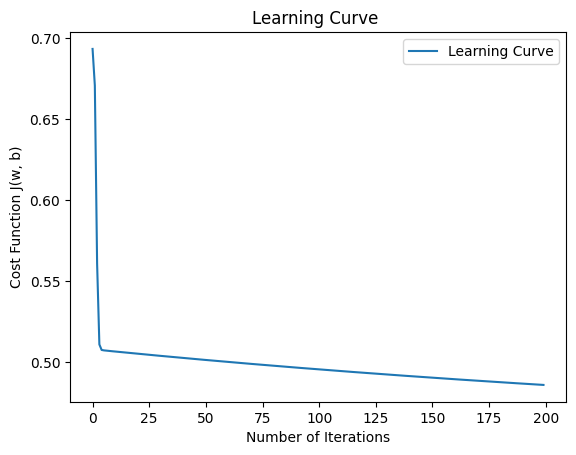

In [236]:
model.fit_data(np.array(x_train), np.array(y_train))

In [237]:
y_hat = model.predict(np.array(x_test))

In [238]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# Assuming y_test contains the true labels and y_hat contains the predicted labels
# Replace y_test and y_hat with your actual test labels and predictions

# Accuracy
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_hat)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_hat)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_hat)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_hat)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("\nConfusion Matrix:")
print(conf_matrix_df)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_hat))


Accuracy: 0.68
Precision: 0.43
Recall: 0.69
F1 Score: 0.53

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         1050          510
Actual 1          170          383

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.76      1560
           1       0.43      0.69      0.53       553

    accuracy                           0.68      2113
   macro avg       0.64      0.68      0.64      2113
weighted avg       0.75      0.68      0.70      2113



Model did converge but still not the best results

## Logistic Regression with Regularization

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import math
class LogisticRegression_Reg:
  def fit_data(self, x, y):
    """
    self.x -> training data (features)
    self.y -> training data (labels/target-values/actual-values)
    self.m -> no of training examples
    self.n -> no of features
    self.w -> initializing weights
    self.b -> initializing bias
    self.y_hat -> initializing prediction's list
    self.cost_rec -> record of cost function of all iterations
    self.min_iterations -> minimum number of iterations for our gradient descent
    self.prediction_threshold -> if the output of sigmoid function is greater than or equal to this threshold, then y_hat will be 1, else 0
    self.lmbd -> regularization parameter
    """
    self.x = x
    self.y = y
    self.m = len(self.x)
    self.n = self.x.shape[1]
    self.w = np.zeros(self.n)
    self.b = 0
    self.y_hat = []
    self.cost_rec = []
    self.min_iterations = 200
    self.prediction_threshold = 0.3
    self.lmbd = 0.01

    # calling recursive gradient descent
    self.recursiveGD()

  def predict_training(self, x):
    y_hat = []
    z = []
    e = math.e
    for i in range(len(x)):
      z.append(np.dot(self.w, x[i]) + self.b)
    for i in range(len(z)):
      y_hat.append((1/(1+(pow(e, -(z[i]))))))
    return y_hat

  def predict(self, x):
    y_hat = []
    z = []
    e = math.e
    for i in range(len(x)):
      z.append(np.dot(self.w, x[i]) + self.b)
    for i in range(len(z)):
      y_hat.append((1/(1+(pow(e, -(z[i]))))))
    for i in range(len(y_hat)):
      if y_hat[i] >= self.prediction_threshold:
        y_hat[i] = 1
      else:
        y_hat[i] = 0
    return y_hat

  def calculate_loss(self):
    loss = 0
    for i in range(len(self.y_hat)):
      loss += ((self.y_hat[i] - self.y[i])**2)
    return loss

  def calculate_cost(self, loss):
    ss_weights = 0
    for i in range(len(self.w)):
      ss_weights += (self.w[i]**2)
    mse = (1/self.m) * loss
    reg_term = (self.lmbd/(2 * self.m)) * ss_weights
    cost = mse + reg_term
    return cost

  def abs_diff(self, a, b):
    # abs_diff stands for absolute difference
    result = abs(a-b)
    return result

  def stopping_criteria_check(self, threshold):
    '''
    Need to check that the cost function for the last 20 iterations has converged
    Also verifying that we have calculated the cost atleast 40 times, idk for what reason but yea (I do know, i mean that's the min number
    of iterations Im aiming for)
    '''
    cost = self.cost_rec

    if len(cost) >= self.min_iterations :
      for i in range(-21, -1, 1):
        if self.abs_diff(cost[i], cost[i+1]) > threshold:
          return 1
        else:
          return 0

    else:
      return 1

  def plot_learningCurve(self):
    # printing the total number of iterations
    print("total number of iterations: ", len(self.cost_rec))

    # plotting the graph
    plt.plot(range(len(self.cost_rec)), self.cost_rec, label='Learning Curve')  # Plot cost_function vs # of iterations
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function J(w, b)')
    plt.title('Learning Curve ')
    plt.legend()
    plt.show()

  def calculate_error_w(self, j):
    error_wj = 0
    for i in range(len(self.y_hat)):
      error_wj += (self.y_hat[i] - self.y[i]) * self.x[i][j]
    return error_wj

  def calculate_error_b(self):
    error_b = 0
    for i in range(len(self.y_hat)):
      error_b += (self.y_hat[i] - self.y[i])
    return error_b

  def recursiveGD(self):

    # making predictions
    self.y_hat = self.predict_training(self.x)

    # calculate loss
    loss = self.calculate_loss()

    # calculate cost
    self.cost_rec.append(self.calculate_cost(loss))

    # calling recursive gradient descent
    self.gradient_descent()


  def gradient_descent(self):
    alpha = 0.009
    threshold = 6e-3 # 0.006

    # stopping criteria
    sc = self.stopping_criteria_check(threshold)
    if sc == 0:
      self.plot_learningCurve()
      return

    # updating w
    for j in range(len(self.w)):
      error = self.calculate_error_w(j)
      reg_term = self.lmbd/self.m * self.w[j]
      self.w[j] = self.w[j] - (alpha * (error/self.m + reg_term))

    # updating b
    error = self.calculate_error_b()
    self.b = self.b - (alpha * (1/self.m) * error)

    # calling recursive gradient descent
    self.recursiveGD()

total number of iterations:  200


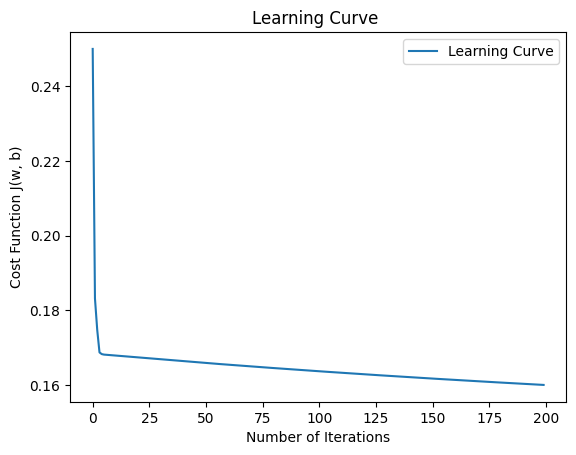

In [247]:
model = LogisticRegression_Reg()
model.fit_data(np.array(x_train), np.array(y_train))
y_hat = model.predict(np.array(x_test))

In [248]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# Assuming y_test contains the true labels and y_hat contains the predicted labels
# Replace y_test and y_hat with your actual test labels and predictions

# Accuracy
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_hat)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_hat)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_hat)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_hat)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("\nConfusion Matrix:")
print(conf_matrix_df)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_hat))


Accuracy: 0.68
Precision: 0.43
Recall: 0.69
F1 Score: 0.53

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         1050          510
Actual 1          170          383

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.76      1560
           1       0.43      0.69      0.53       553

    accuracy                           0.68      2113
   macro avg       0.64      0.68      0.64      2113
weighted avg       0.75      0.68      0.70      2113

